In [3]:
import netCDF4
import numpy as np
from scipy.ndimage.filters import gaussian_filter
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
%matplotlib inline
# read provided netcdf
ncpath='../ncfiles/Ocean1_input_geom_v1.01.nc'
x = netCDF4.Dataset(ncpath).variables['x'][::2]
y = netCDF4.Dataset(ncpath).variables['y'][::2]
[X,Y]=np.meshgrid(x/1.0e3,y/1.0e3)

# read 3D file
file3D = netCDF4.Dataset('../ncfiles/Ideal_3D.nc','r+')
area3D=file3D.variables['area'][:]
# read 3D file
file2D = netCDF4.Dataset('../ncfiles/Ideal_2D.nc','r+')
area2D=file2D.variables['area'][:]

area2D.shape

(240, 4)

240


/ncrc/home2/Gustavo.Marques/anaconda2/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


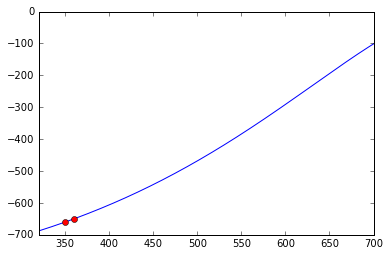

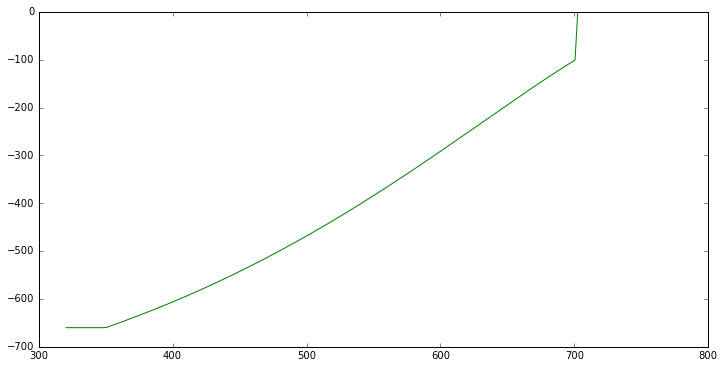

In [4]:
xx=np.array([350,360,640,700])*1.0e3
yy=[-660,-650,-240,-200]

p = np.poly1d(np.polyfit(xx, yy, 12))
lower=p(x)
plt.figure()
plt.plot(x/1.0e3,lower)
plt.plot(xx/1.0e3,yy,'ro')
plt.xlim(320,700)
upper=np.ones(len(x))*100.
a=np.nonzero(x<=350*1.0e3)[-1][-1]
b=np.nonzero(x>=700*1.0e3)[0][0]
#print x[a],x[b]
upper[b+1::]=0.0
lower[0:a+1]=-660;lower[b+1::]=0.0
 
thick = upper - lower
# plot
plt.figure(figsize=(12,6))
plt.plot(x/1.0e3,lower,'g')
print len(upper)
#plt.xlim(300,350)

In [26]:
# put into netcdf files
area2D = np.ones((area2D.shape))* (x[1]-x[0]) * (y[1]-y[0])
area3D = np.ones((area3D.shape))* (x[1]-x[0]) * (y[1]-y[0])
upper2D = np.ones((area2D.shape))
upper3D = np.ones((area3D.shape))
lower2D = np.ones((area2D.shape))
lower3D = np.ones((area3D.shape))

# 2D
for i in range(area2D.shape[1]):
    upper2D[:,i]=upper[:]
    lower2D[:,i]=lower[:]
    
thick2D=upper2D - lower2D
area2D[thick2D==0.0]=0.0

# 3D
for i in range(area3D.shape[1]):
    upper3D[:,i]=upper[:]
    lower3D[:,i]=lower[:]
    
thick3D=upper3D - lower3D
area3D[thick3D==0.0]=0.0

# 3D
file3D.variables['area'][:,:] = area3D[:,:]
file3D.variables['thick'][:,:] = thick3D[:,:]
file3D.variables['height'][:,:] = lower3D[:,:]

# 2D (middle of the domain)
file2D.variables['area'][:,:] = area2D[:,:]
file2D.variables['thick'][:,:] = thick2D[:,:]
file2D.variables['height'][:,:] = lower2D[:,:]

file2D.close()
file3D.close()